In [1]:
import  numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
r0= 4.76/2*10**-3 # unit: mm\n",
re = np.linspace(3,13,21)*10**-3
ha = 300 #unit: w/m^2k
k = 400 # unit:w/mK
df = 0.1*10**-3 # mm
m = (ha*2/(k*df))**0.5

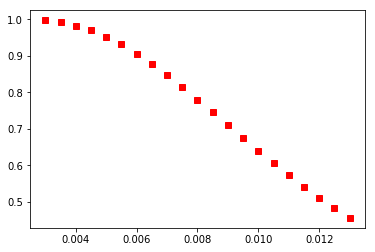

In [2]:
B1 = (sp.i1(m*re)*sp.k1(m*r0)-sp.k1(m*re)*sp.i1(m*r0))/(sp.i0(m*r0)*sp.k1(m*re)+sp.i1(m*re)*sp.k0(m*r0))
B1
uf = 2*r0*B1/(m*(re**2-r0**2))
uf
plt.plot(re,uf,"rs")
plt.show()

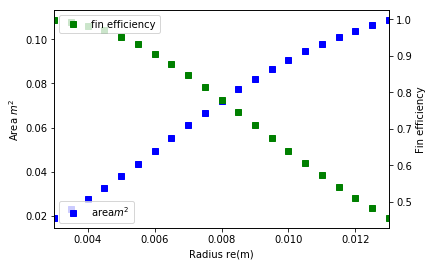

In [3]:
L = 1 # length is 1 m\n",
fp = 0.005 
A_tot = np.pi*2*r0*L+ 2*np.pi*(r0+re)*(re-r0)*L/fp *uf

fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(re, A_tot,'bs',label="area$m^2$")
ax1.legend(loc=3)
ax1.set_xlabel('Radius re(m)')
ax1.set_ylabel('Area $m^2$')
ax2 = ax1.twinx() # this is the important function\n",
ax2.plot(re, uf, 'gs',label = "fin efficiency")
ax2.legend(loc=2)
ax2.set_xlim([re[0], re[-1]])
ax2.set_ylabel('Fin efficiency')
fig.savefig("area_&_fin_efficicency.png")
plt.show()

In [4]:
for i in range(len(re)):
    print(re[i],uf[i],A_tot[i])

0.003 0.997845373209 0.0191365881964
0.0035 0.992443304653 0.0231671530509
0.004 0.983259109226 0.0277246467131
0.0045 0.970032701535 0.0327335217687
0.005 0.952706771061 0.0381026896853
0.0055 0.931417344247 0.0437302839392
0.006 0.906471801087 0.0495094468367
0.0065 0.878315924373 0.0553343983257
0.007 0.847493636023 0.0611060445482
0.0075 0.81460412959 0.0667365243279
0.008 0.780261059625 0.0721523264743
0.0085 0.74505751049 0.0772958730348
0.009 0.709539035519 0.0821256917248
0.0095 0.67418555437 0.0866154557172
0.01 0.639401644322 0.0907522397422
0.0105 0.605513925443 0.0945343396057
0.011 0.572773838842 0.0979689513283
0.0115 0.541364072791 0.10106993149
0.012 0.511407083863 0.103855782529
0.0125 0.48297447225 0.106347938737
0.013 0.456096311598 0.108569376526


In [5]:
D0 = 4
L = 250
At = np.pi*D0*L
fp = 5
H =5
Ds = 2*H+D0
A_fin = H*np.pi*Ds*L/fp
Atot =At+A_fin*uf[8]
print(Ds)
print(At,A_fin,Atot,Atot/At)
print("if use rectanglar fin:",885*2*25)
deltf = 0.2*10**-3
vol = A_fin*deltf*10**-6

price = 65*8.9*10**3*vol
price
#print(Atot*10**-6*2)

14
3141.592653589793 10995.574287564275 12460.2718867 3.96622772608
if use rectanglar fin: 44250


1.2721879450711866

In [6]:
print("---------------square flat fin price calculation:--------")
price_coopertube = 55 # yuan / kg
price_cooperbelt = 65 # yuan/kg
D_t = 4.76 # mm
D_t_in = 4.76 - 1.2 # mm
L_t = 500 # mm
rho_cp = 8.9*10**3 # kg /m^3
price_tube = price_coopertube*np.pi/4*(D_t**2 -D_t_in**2)*L_t*10**-9*rho_cp
print(price_tube)

lw = 35
lh = 15
n = 20
f_pl = 0.13*10**-3 # fin thickness 
A_flatfin = lw*lh*n*2*10**-6-np.pi*D_t**2/4*2*10**-6
print(A_flatfin)
price_flatfin = A_flatfin/2*f_pl*rho_cp*price_cooperbelt
print("total effective heat transfer area is",A_flatfin*0.84,"m^2")
print("price of flat cooper fin is ",price_flatfin,"￥")
print("total material price of tube & fin is",price_flatfin+price_tube,"￥")


 

---------------square flat fin price calculation:--------
1.919186385707391
0.02096440952514601
total effective heat transfer area is 0.01761010400112265 m^2
price of flat cooper fin is  0.788314209169303 ￥
total material price of tube & fin is 2.707500594876694 ￥


In [7]:
D_out = float(input(">>input tube outer diameter,unit:mm"))
th = float(input(">>input tube wall thickness,unit:mm"))
Lt = float(input(">>input tube length,unit:mm") )
Price_cp = 55 #"yuan/kg"
rho_cp = 8.9*10**3 #"kg/m^3"
vol_t =np.pi/4*(D_out**2 -(D_out-th*2)**2)*Lt*10**(-9)
Cost_tube = rho_cp*vol_t*Price_cp
print ("tube cost is ",Cost_tube)

tube cost is  -0.009226857623593224
